# Phase 1 – Mini Project

In this lab, we will create a small program that will use the following skills learned in phase 1:
- Manipulating string data
- Navigating a json/dictionary data structure
- Sending a request to an api and collecting the response
- Scraping data from a webpage
- Data Vizualization

## Your Task

In this notebook, you will write nine functions. When used together, these functions produce a simple python application that receives a date and outputs a report detailing the following:
- Whether or not the day was a public holiday
- What historical events occured on that day
- The top 5 stock price increases and decreases for that day. 



### Specifically this program will...

1. Receive a date formatted as `month/day/year`
1. Parse the date to create individual variables for 
    - Month (string)
    - Day (string)
    - Year (string)
    - Month Name (string)
1. Query the public holidays api to check if the date was a holiday.
1. Connect to the `www.onthisday.com` website and scrape the `Important Events` listed for a given date.
1. Manipulate a dataset of stock information and find the 5 largest stock increases and declines for an inputted day.
1. Visualize the top five increases and declines using subplots.

The goal is to produce a function that will have an output like the one seen below. Some code has been provided to generate the report itself, your job is to write the functions to collect and organize the data, and we'll do the rest.

-------

<img src="./example.png" width="800px">

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Task 1

In the cell below, define a function called `parse_date`.

This function should 
- Receive a single argument `date` with a datatype of string.
- The expected format of the string should be `month/day/year` where both month and day are integers.
- Parse the date variable to seperate the month and day integers.
- Map the month integer to the name of the month using the provided dictionary
- Returns the month (string), the day (string), and the name of the month (string)

An example output for this function would look as follows:

```python
parse_date('06/03/2015')
>> ('06', '03', '2015' ,'June')
```

In [4]:
def parse_date(date):
    
    mapper = {1: 'January', 2: 'February', 3: 'March',
              4: 'April', 5: 'May', 6: 'June', 7: 'July',
              8: 'August', 9: 'September', 10:'October', 
              11: 'Novembers', 12: 'December'}
    month, day, year = date.split('/')
    return month.zfill(2), day.zfill(2), year, mapper[int(month)]

## Task 2

In the cell below, define a function called `holidays_api` 

This function should do the following:

- Receive a single argument called `year` with a datatype of string.
- Connects to the [Public Holidays API](https://date.nager.at/Api) and returns the public holidays data for the inputted year.

An example output of this function would look like this:

```python
holidays_api('2015')
>> [{'date': '2015-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
```

In [6]:
def holidays_api(year):
    url = f'https://date.nager.at/Api/v2/PublicHolidays/{year}/US'
    response = requests.get(url)
    return response.json()

## Task 3

In the cell below, define a function called `is_public_holiday` that receives four arguments
1. month - integer
2. day - integer
4. year - integer
3. holiday_data - list

This function should:
- Loop over the holiday_data list and check if the date is found within the data. If the date is not found, the function should return None. If a date is found, the function should return the name of the holiday.

An example of this function's output looks like this:

```python
is_public_holiday('09', '07', '2015', holiday_data)
>>> 'Labour Day'
```

In [8]:
def is_public_holiday(month, day, year, holiday_data):
    date = f'{year}-{month}-{day}'
    for holiday in holiday_data:
        if holiday['date'] == date:
            return holiday['name']

## Task 4

In the cell below define a function called `get_historical_events` that scrapes the historical events for a given day.

This function should receive 2 arguments:
1. The name of a month
2. The day of the month.

The url format for this problem is as follows:

`f'https://www.onthisday.com/day/{month_name}/{day}'`

This function should return a list of strings for each historical event for the inputted date.

The desired output looks like this 

```python
get_historical_events('July', '07')
>> ['1520 Battle of Otumba, Mexico: Hernán Cortés and the Tlaxcalans defeat a numerically superior Aztec force',
 '1937 Japanese and Chinese troops clash at the Marco Polo Bridge, beginning the Second Sino-Japanese War',
 '1947 Alleged and disputed Roswell UFO incident',
 "2005 Coordinated terrorist bomb blasts strike London's public transport system during the morning rush hour killing 52 and injuring 700",
 '2005 Influenced by Live 8, the G8 leaders pledge to double 2004 levels of aid to Africa from US$25 to US$50 billion by the year 2010',
 '1936 RCA shows 1st real TV program (dancing, film on locomotives, Bonwit Teller fashion show and monologue from Tobacco Road & comedy)',
 "1990 First Three Tenors concert featuring Plácido Domingo, José Carreras and Luciano Pavarotti at Baths of Caracalla in Rome - recording of is world's best-selling classical record",
 "1990 Wimbledon Women's Tennis: Martina Navratilova wins her record 9th Wimbledon singles title beating American Zina Garrison 6-4, 6-1",
 '1932 Author Damon Runyon (51) weds Patrice Amati del Grande',
 '1946 39th US President Jimmy Carter (21) weds Rosalynn Smith (18) in Plains, Georgia',
 '1970 Actress Shelley Duvall (21) weds Bernard Sampson',
 '1943 Heavyweight boxing champ Jack Dempsey (48) divorces broadway singer Hannah Williams (32) after 10 years of marriage',
 '1953 Actor José Ferrer divorces dancer and actress Phyllis Hill after 5 years of marriage',
 '1994 Actress Diane Lane files for divorce from Christopher Lambert']
```

In [10]:
def get_historical_events(month_name, day):    
    url = f'https://www.onthisday.com/day/{month_name}/{day}'
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html)
    events = soup.find_all('li', {'class': 'event'})
    event_details = [event.text for event in events]
    return event_details

## Task 5

A `json` data file containing stock data is stored in the `data` folder of this repository with the filename `stock-data.json`.

In the cell below
- Open a connection to the stock data file using the python `open` function. 
- Load the contents of the file into the variable `data` using the `json` library. 
- Ensure the connection to the stock data file is closed. 

In [85]:
import json

# Open a connection to the stock data file
# using the python `open` function
file = open('data/stock-data.json', 'r')

# Load the contents of the file into the variable
# `data` using the json library
data = json.load(file)

# Ensure the connection
# to the stock data file is closed
file.close()

## Task 6

The next three tasks will focus on pulling information out of the `data` variable. 

Let's first write a function that will find the stock data for every company that occurs on a specific date. 
 

#### `get_companies`

This function has the following inputs:

- month: String. 
- day:   String
- year:  String.
- data:  Dictionary. 

This function should return:

- List. The stock information for every company for the inputted date. 

In [ ]:
def get_company_stocks(month, day, year, data):
    # Create a string variable called `date`
    # that has the following format:
    # `year-month-day`
    #===============
    # YOUR CODE HERE
    #===============
    # Create an empty list
    # called `found_stocks`
    #===============
    # YOUR CODE HERE
    #===============
    
    # Loop over the company names in the data variable
    #===============
    # YOUR CODE HERE
    #===============
    
        # Loop over the stock entries for the company
        #===============
        # YOUR CODE HERE
        #===============
            # Check if the date in the stock entry
            # is equal to the `date` variable
            #===============
            # YOUR CODE HERE
            #===============
                # Add the name of the company
                # to the stock entry
                #===============
                # YOUR CODE HERE
                #===============
                # Append the entry to the 
                # `found_stocks` list
                #===============
                # YOUR CODE HERE
                #===============
                
    # Return the found stocks
    #===============
    # YOUR CODE HERE
    #===============

In [ ]:
def get_company_stocks(month, day, year, data):
    # Create a string variable called `date`
    # that has the following format:
    # `year-month-day`
    date = f'{year}-{month}-{day}'
    
    # Create an empty list
    # called `found_stocks`
    found_stocks = []
    
    # Loop over the company names in the data variable
    for company in data:
        # Loop over the stock entries for the company
        for entry in data[company]:
            # Check if the date in the stock entry
            # is equal to the `date` variable
            if entry['date'] == date:
                # Add the name of the company
                # to the stock entry
                entry['name'] = company
                # Append the entry to the 
                # `found_stocks` list
                found_stocks.append(entry)
    
    # Return the found stocks
    return found_stocks

## Task 7

The stock data does not actually have information about price changes. It only has the opening and closing prices for each day.

Let's define a function that will loop over stock entries and calculate the price change that took place on that day. 

#### `get_price_changes`

This function has the following inputs:

- found_stocks: List. The stock information for every company for a specific day. 

This function should return:

- List. A list sorted in descending order of price changes (close-open)
    - The list should contains tuples with the following format:
    ```(Name of company, Price change)```

In [ ]:
def get_price_changes(found_stocks):
    # Create an empty list
    # called `price_changes`
    price_changes = []
    
    # Loop over the entries in the
    # `found_stocks` variable
    for entry in found_stocks:
        # Calculate the price change for the entry
        change = entry['close'] - entry['open']
        # Create a tuple variable with the 
        # format `(Company name, Price change)`
        obsv = (entry['name'], change)
        # Append the tuple to the
        # `price_changes` list
        price_changes.append(obsv)
        
    # Sort the `price_changes` list in descending order
    sorted_changes = sorted(price_changes, key=lambda x: x[1], reverse=True)
    # Return the sorted price changes
    return sorted_changes

Ok, now let's define a function that will call the previous two functions, and then return information about the companies that saw the best stock increases and worst stock decreases on a given day. 

## Task 8

#### `find_top_stock_changes`

This function has the following inputs:

- month: String. 
- day:   String
- year:  String.
- data:  Dictionary. 

This function should return four lists:
1. A list of 5 stock names with the highest increases on the inputted day
2. A list of 5 stock names with the highest declines on the inputted day
3. A list of the 5 stock changes for top increases
4. A list of the 5 stock changes for top declines.


An example of this function's output looks like this:
```python
find_top_stock_changes('09', '08', '2015', data)
>> (['REGN', 'PCLN', 'AZO', 'AMZN', 'EQIX'],
 ['PVH', 'RRC', 'MCK', 'COO', 'NFLX'],
 [27.879999999999995,
  12.400000000000091,
  9.860000000000014,
  8.849999999999966,
  8.059999999999945],
 [-0.7999999999999972,
  -0.9300000000000068,
  -0.960000000000008,
  -3.890000000000015,
  -7.1299999999999955])
```

In [ ]:
def find_top_stock_changes(month, day, year, data):
    # Pass the inputs into the
    # `get_company_stocks` function
    stocks = get_company_stocks(month, day, year, data)
    
    # Pass the output of the previous step
    # into the `get_price_changes` function
    price_changes = get_price_changes(stocks)
    
    # Isolate the company names for the
    # top five increases and top five decreases
    # according to price change. Each should be their own list.
    top_five_names = [x[0] for x in price_changes[:5]]
    low_five_names = [x[0] for x in price_changes[-5:]]
    
    # Isolate the top five price changes and top five price
    # decreases. Each should be their own list. 
    top_five_changes = [x[1] for x in price_changes[:5]]
    low_five_changes = [x[1] for x in price_changes[-5:]]
    
    # Return
    # 1. Names of companies with top five price increase
    # 2. Names of companies with top five price decrease
    # 3. Price changes that correspond to return item #1
    # 4. Price changes that correspond to reture item #2
    return top_five_names, low_five_names, top_five_changes, low_five_changes

## Task 9

In the cell below, define a function that receives 4 arguments
1. increase_names - A list of 5 stock names with the highest increases 
2. decline_names - A list of 5 stock names with the highest declines
3. increase_change - A list of the 5 stock changes for top increases
4. decline_change - A list of the 5 stock changes for top declines.


This function should:

- Output two bar charts next to each other the show the increases and declines for the inputted stock changes.

This function's output should look like this:

![](plot_stock_info.png)

In [93]:
def plot_stock_info(increase_names, decline_names, increase_change, decline_change):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    
    axes[0].bar(increase_names, increase_change, color='green')
    axes[1].bar(decline_names, decline_change, color='red')
    
    axes[0].set_title('Top 5 stock increase')
    axes[1].set_title('Top 5 stock declines')
    

# Put it all together

In the cell below, we provide some code for printing the report.

Run this cell unchanged.

In [100]:
import json

# Open a connection to the stock data file
# using the python `open` function
file = open('data/stock-data.json', 'r')

# Load the contents of the file into the variable
# `data` using the json library
data = json.load(file)

# Ensure the connection
# to the stock data file is closed
file.close()
def main(date, stock_data):
    month, day, year, month_name = parse_date(date)
    display(Markdown("# {}/{} Report\n\n".format(month, day)))
    holidays_data =  holidays_api(year)
    holiday = is_public_holiday(month, day, year, holidays_data)
    historical_events = get_historical_events(month_name, day)
    increase_names, decrease_names, increase_changes, decrease_changes = find_top_stock_changes(month, day, 
                                                                                           year, data)
    print_holiday(month, day, year, holiday)
    print_historical_events(historical_events)
    if increase_names and decrease_names:
        plot_stock_info(increase_names, decrease_names, increase_changes, decrease_changes)
    else:
        display(Markdown("\n\n**No stock data was found for this day.**"))


def print_holiday(month, day, year, holiday):
    template = ''
    if holiday:
        template += "{}/{}/{} is **{}**!\n\n".format(month, day, year, holiday)
    else:
        template += "**{}/{} was not a public holiday in {}.**".format(month, day, year)
    markdown = Markdown(template)
    display(markdown)
        
def print_historical_events(events):
    
    events_formatted = [f'**{event.split()[0]}** ' + ' '.join(event.split()[1:]) for event in events]
    template = '### Historical Highlights'
    for event in events_formatted:
        template += '\n\n- ' + event

    markdown = Markdown(template)
    display(markdown)
    


# Run your code

If each of your functions were named correctly, received the correct number of arguments and in the correct order, and output the correct data, the following function should generate the report!

# 09/08 Report



**09/08 was not a public holiday in 2015.**

### Historical Highlights

- **1380** Battle on Kulikovo: Moscow's great monarch Dimitri defeats the Mongols beginning the decline of the Tatars

- **1504** Michelangelo's Statue of David is unveiled in Florence

- **1522** Spanish navigator Juan de Elcano returns to Spain, completing 1st circumnavigation of the globe (expedition began under Ferdinand Magellan)

- **1565** 1st permanent European settlement in the US founded at St. Augustine, Florida

- **1664** Dutch surrender colony of New Netherlands (including New York) to 300 English soldiers

- **1965** A small ad in New York’s Daily Variety attracts 437 young men interested in forming the world’s first manufactured boy band, "The Monkees"

- **1970** Black September hijackings begin, three airliners hijacked and blown up by Popular Front for the Liberation of Palestine

- **1986** "The Oprah Winfrey Show" is first broadcast nationally

- **1960** Nationwide release (US) of Alfred Hitchcock's "Psycho" starring Anthony Perkins and Janet Leigh

- **2001** Kylie Minogue releases her single "I Just Can't Get You Out of My Head", the biggest of her career

- **1973** Hank Aaron sets record of most HRs in 1 league (709)

- **1761** Marriage of George III of the United Kingdom to Charlotte of Mecklenburg-Strelitz (Queen Charlotte).

- **1864** Business magnate John D. Rockefeller (25) weds abolitionist Laura Spelman (24)

- **1897** Confederate General James Longstreet (76) weds Helen Dortch (34) at the governor's mansion in Atlanta, Georgia

- **2009** 90s pop sensation singer Peter Andre (36) divorces glamour model Katie Price (31) due to unreasonable behaviour after 3 years of marriage

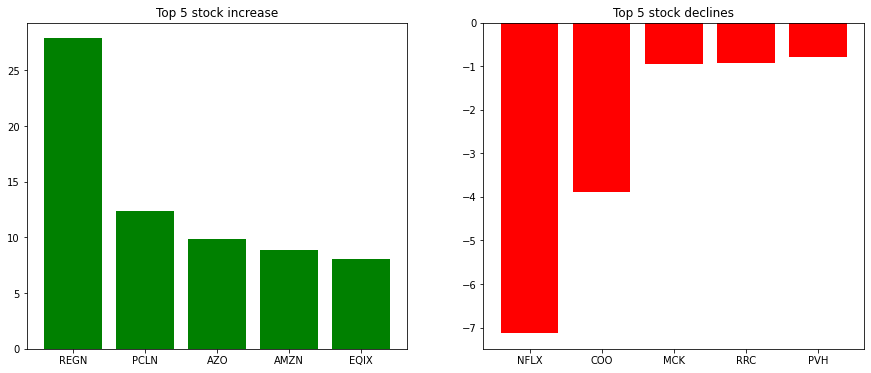

In [20]:
main('09/08/2015', data)